#### Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Task 1: Merging 12 months of Sales Data into a single file

In [2]:
files = [file for file in os.listdir('./blessedera techies july 24')]
for file in files:
    print(file)

Sales_April_2023.csv
Sales_August_2023.csv
Sales_December_2023.csv
Sales_February_2023.csv
Sales_January_2023.csv
Sales_July_2023.csv
Sales_June_2023.csv
Sales_March_2023.csv
Sales_May_2023.csv
Sales_November_2023.csv
Sales_October_2023.csv
Sales_September_2023.csv


In [3]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./blessedera techies july 24/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
    
# all_months_data.head()
all_months_data.to_csv('all_data.csv', index=False)

#### Read in Updated Dataframe

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301"
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016"
2,178874,Apple Airpods Headphones,1,150.0,04/20/23 09:47,"877 7th St, New York City, NY 10001"
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035"
4,178876,Apple Airpods Headphones,1,150.0,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001"


### Cleaning Up the Data

### Dropping rows of NAN

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
44,NaN,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,NaN,NaN,NaN,NaN
873,NaN,NaN,NaN,NaN,NaN,NaN
1062,NaN,NaN,NaN,NaN,NaN,NaN
1087,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301"
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016"
2,178874,Apple Airpods Headphones,1,150.0,04/20/23 09:47,"877 7th St, New York City, NY 10001"
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035"
4,178876,Apple Airpods Headphones,1,150.0,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001"


### Find 'Or' and delete it

In [7]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
751,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1785,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1919,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2949,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301"
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016"
2,178874,Apple Airpods Headphones,1,150.0,04/20/23 09:47,"877 7th St, New York City, NY 10001"
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035"
4,178876,Apple Airpods Headphones,1,150.0,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001"


#### Convert Columns to the Correct data Type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # making it int()
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # making it float()


### Augument data with additional columns

###  Task 2: Add Month Column

In [10]:
all_data['Month'] = 3
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",3
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",3
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",3
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",3
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",3


In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",04
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",04
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",04
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",04
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",04


In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",4
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",4
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",4
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",4
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",4


#### Task 3: Add a Sale Column

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",4,149.99
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",4,999.99
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",4,150.00
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",4,389.99
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",4,150.00


### Adding a city & City with Postcode Column USING .apply()

In [14]:
# function that also be use to get address
def get_city(city):
    return city.split(',')[1]

all_data['City1'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State & Postcode'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2])
all_data['Postcode'] = all_data['State & Postcode'].str[3:9] # This code is also working like the one below 
all_data['Postcode1'] = all_data['State & Postcode'].apply(lambda x: x.split(' ')[2])
all_data['State'] = all_data['State & Postcode'].apply(lambda x: x.split(' ')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City1,City,State & Postcode,Postcode,Postcode1,State
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,Atlanta,GA 30301,30301,30301,GA
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,San Francisco,CA 94016,94016,94016,CA
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",4,150.00,New York City,New York City,NY 10001,10001,10001,NY
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",4,389.99,Portland,Portland,OR 97035,97035,97035,OR
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,New York City,NY 10001,10001,10001,NY


### let me drop some of the columns

In [15]:
all_data = all_data.drop(columns=['Postcode1','City1','State & Postcode'])
# or all_data = all_data.drop(columns=['Postcodre','Postcode1','City1','State & Postcode'], inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,30301,GA
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,94016,CA
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",4,150.00,New York City,10001,NY
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",4,389.99,Portland,97035,OR
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,10001,NY


### i want to get the city and state together in the same column

In [16]:
# method 1
def get_city(City):
    return City.split(',')[1]

def get_state(State):
    return State.split(',')[2].split(' ')[1]
all_data['City with State'] = all_data['Purchase Address'].apply(lambda x: get_city(x)  + ' (' + get_state(x) + ')')

# method 2

all_data['City & State'] = all_data['City'] + ' ' + '(' + all_data['State'] + ')'

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State,City with State,City & State
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA)
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA)
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY)
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",4,389.99,Portland,97035,OR,Portland (OR),Portland (OR)
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY)


#### Task 4: converting Order Date to Datetime Field to answer Question 3

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State,City with State,City & State
0,178872,27in FHD Monitor,1,149.99,04/05/23 20:12,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA)
1,178873,ThinkPad Laptop,1,999.99,04/05/23 19:33,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA)
2,178874,Apple Airpods Headphones,1,150.00,04/20/23 09:47,"877 7th St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY)
3,178875,27in 4K Gaming Monitor,1,389.99,04/10/23 11:30,"168 River St, Portland, OR 97035",4,389.99,Portland,97035,OR,Portland (OR),Portland (OR)
4,178876,Apple Airpods Headphones,1,150.00,04/09/23 10:38,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY)


In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State,City with State,City & State
0,178872,27in FHD Monitor,1,149.99,2023-04-05 20:12:00,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA)
1,178873,ThinkPad Laptop,1,999.99,2023-04-05 19:33:00,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA)
2,178874,Apple Airpods Headphones,1,150.00,2023-04-20 09:47:00,"877 7th St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY)
3,178875,27in 4K Gaming Monitor,1,389.99,2023-04-10 11:30:00,"168 River St, Portland, OR 97035",4,389.99,Portland,97035,OR,Portland (OR),Portland (OR)
4,178876,Apple Airpods Headphones,1,150.00,2023-04-09 10:38:00,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY)


## Question 1: What was the best month for sales? and How much was earned that Month ?

In [19]:
# Sales in the 12 Months
answer = all_data.groupby('Month').sum()
answer

,Quantity Ordered,Price Each,Sales
Month,,,
1,12524,2173477.00,2185681.70
2,17346,2977529.27,2994262.23
3,13982,2422926.06,2438506.76
4,9567,1673930.12,1683978.28
5,15782,2693842.00,2709537.18
6,15587,2720675.79,2738896.48
7,7137,1283599.33,1290233.18
8,15197,2639865.93,2653521.88
9,15736,2743057.14,2757076.70


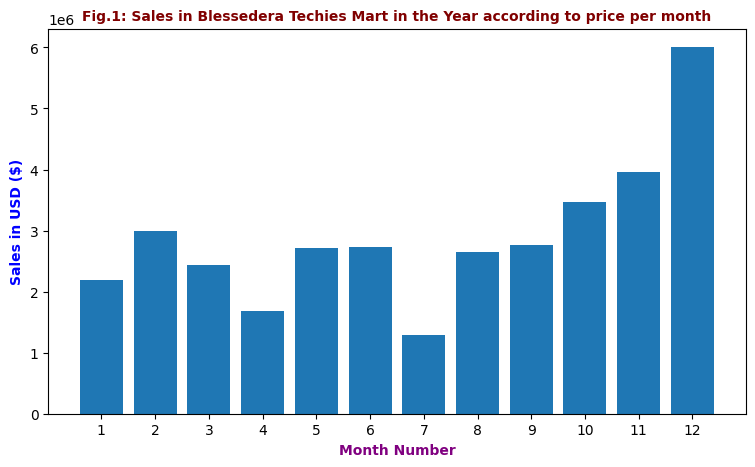

In [20]:
months = range(1,13)
fig = plt.figure(figsize=(9,5))
plt.bar(months, answer['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)', color='blue', size=10, weight='bold')
plt.title('Fig.1: Sales in Blessedera Techies Mart in the Year according to price per month',  color='maroon', size=10, weight='bold')
plt.xlabel('Month Number', color='purple', size=10, weight='bold' )
plt.show()

### Question 2: What city has the highest sales

In [21]:
answer2 = all_data.groupby('City').sum()
answer2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16090,2827844.40,105793,2844789.53
Austin,10598,1838670.89,69587,1847450.28
Boston,21314,3785821.24,139164,3804415.50
Dallas,15925,2758130.26,105343,2772983.25
Los Angeles,31970,5489351.74,209166,5529505.22
New York City,26824,4705098.00,176054,4729417.56
Portland,13194,2288812.32,86739,2302751.85
San Francisco,47670,8203196.76,313673,8250250.08
Seattle,15824,2787294.04,104006,2801239.20


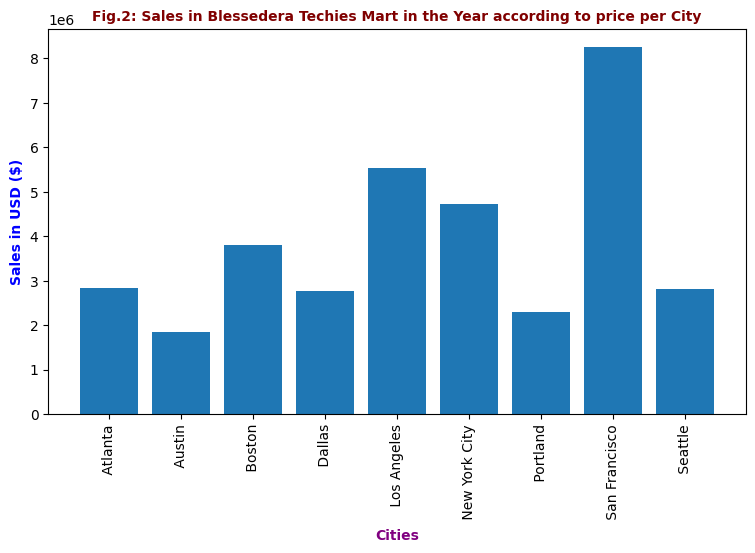

In [22]:

cities = [city for city, df in all_data.groupby('City')]
fig = plt.figure(figsize=(9,5))
plt.bar(cities, answer2['Sales'])
plt.xticks(cities, rotation=90)
plt.ylabel('Sales in USD ($)', color='blue', size=10, weight='bold')
plt.title('Fig.2: Sales in Blessedera Techies Mart in the Year according to price per City',  color='maroon', size=10, weight='bold')
plt.xlabel('Cities', color='purple', size=10, weight='bold' )
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State,City with State,City & State,Hour,Minute
0,178872,27in FHD Monitor,1,149.99,2023-04-05 20:12:00,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA),20,12
1,178873,ThinkPad Laptop,1,999.99,2023-04-05 19:33:00,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA),19,33
2,178874,Apple Airpods Headphones,1,150.00,2023-04-20 09:47:00,"877 7th St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY),9,47
3,178875,27in 4K Gaming Monitor,1,389.99,2023-04-10 11:30:00,"168 River St, Portland, OR 97035",4,389.99,Portland,97035,OR,Portland (OR),Portland (OR),11,30
4,178876,Apple Airpods Headphones,1,150.00,2023-04-09 10:38:00,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY),10,38


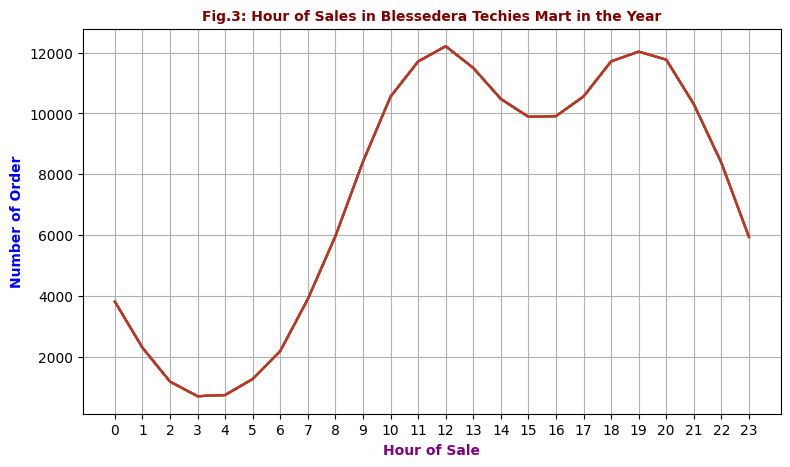

In [24]:
hours = [hour for hour, df in all_data.groupby('Hour')]
fig = plt.figure(figsize=(9,5))
# plt.bar(cities, answer2['Sales'])
plt.xlabel('Hour of Sale', color='purple', size=10, weight='bold' )
plt.ylabel('Number of Order', color='blue', size=10, weight='bold')
plt.title('Fig.3: Hour of Sales in Blessedera Techies Mart in the Year',  color='maroon', size=10, weight='bold')
plt.grid()
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.show()

# 

#### my Recommendation  time is around 12 noon (12th hour of the day) or 7pm (19th hour of the day)

### Question 4: What Products are most often sold together ?

In [25]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )
df.head()

c:\users\havil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State,City with State,City & State,Hour,Minute,Grouped
59,178930,iPhone,1,700.00,2023-04-08 10:34:00,"821 12th St, San Francisco, CA 94016",4,700.00,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA),10,34,"iPhone,34in Ultrawide Monitor"
60,178930,34in Ultrawide Monitor,1,379.99,2023-04-08 10:34:00,"821 12th St, San Francisco, CA 94016",4,379.99,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA),10,34,"iPhone,34in Ultrawide Monitor"
66,178936,Wired Headphones,1,11.99,2023-04-14 00:45:00,"627 Wilson St, Atlanta, GA 30301",4,11.99,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA),0,45,"Wired Headphones,AA Batteries (4-pack)"
67,178936,AA Batteries (4-pack),2,3.84,2023-04-14 00:45:00,"627 Wilson St, Atlanta, GA 30301",4,7.68,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA),0,45,"Wired Headphones,AA Batteries (4-pack)"
94,178963,Wired Headphones,1,11.99,2023-04-27 16:56:00,"910 Jefferson St, Boston, MA 02215",4,11.99,Boston,02215,MA,Boston (MA),Boston (MA),16,56,"Wired Headphones,AAA Batteries (4-pack)"


#### i realise there are duplicates in Grouped Ordered so i want to drop the duplicates

In [26]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
59,178930,"iPhone,34in Ultrawide Monitor"
66,178936,"Wired Headphones,AA Batteries (4-pack)"
94,178963,"Wired Headphones,AAA Batteries (4-pack)"
98,178966,"iPhone,Apple Airpods Headphones"
103,178970,"Vareebadd Phone,USB-C Charging Cable"


In [27]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1010),
 (('iPhone', 'Wired Headphones'), 445),
 (('iPhone', 'Apple Airpods Headphones'), 330),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 325),
 (('Vareebadd Phone', 'Wired Headphones'), 131),
 (('Lightning Charging Cable', 'Wired Headphones'), 100),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 93),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 73),
 (('USB-C Charging Cable', 'Wired Headphones'), 69),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 58)]

In [28]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1010
('iPhone', 'Wired Headphones') 445
('iPhone', 'Apple Airpods Headphones') 330
('Vareebadd Phone', 'USB-C Charging Cable') 325
('Vareebadd Phone', 'Wired Headphones') 131
('Lightning Charging Cable', 'Wired Headphones') 100
('Lightning Charging Cable', 'Apple Airpods Headphones') 93
('Vareebadd Phone', 'Bose SoundSport Headphones') 73
('USB-C Charging Cable', 'Wired Headphones') 69
('USB-C Charging Cable', 'Bose SoundSport Headphones') 58


### Question 5: What product sold the most? Why do you think it sold the most

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Postcode,State,City with State,City & State,Hour,Minute
0,178872,27in FHD Monitor,1,149.99,2023-04-05 20:12:00,"20 North St, Atlanta, GA 30301",4,149.99,Atlanta,30301,GA,Atlanta (GA),Atlanta (GA),20,12
1,178873,ThinkPad Laptop,1,999.99,2023-04-05 19:33:00,"544 14th St, San Francisco, CA 94016",4,999.99,San Francisco,94016,CA,San Francisco (CA),San Francisco (CA),19,33
2,178874,Apple Airpods Headphones,1,150.00,2023-04-20 09:47:00,"877 7th St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY),9,47
3,178875,27in 4K Gaming Monitor,1,389.99,2023-04-10 11:30:00,"168 River St, Portland, OR 97035",4,389.99,Portland,97035,OR,Portland (OR),Portland (OR),11,30
4,178876,Apple Airpods Headphones,1,150.00,2023-04-09 10:38:00,"919 Jefferson St, New York City, NY 10001",4,150.00,New York City,10001,NY,New York City (NY),New York City (NY),10,38


In [30]:
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,3813,415762.20,27637,419391.87,54386,113281
27in 4K Gaming Monitor,5776,2245172.43,42021,2252582.24,83286,169578
27in FHD Monitor,7206,1073628.42,52802,1080827.94,102803,214132
34in Ultrawide Monitor,5801,2200902.08,43021,2204321.99,83415,172208
AA Batteries (4-pack),26504,74933.76,144500,101775.36,279811,578620
AAA Batteries (4-pack),29085,57796.70,141423,86964.15,278372,571973
Apple Airpods Headphones,14462,2154450.00,105959,2169300.00,207300,424808
Bose SoundSport Headphones,12522,1240575.93,91520,1252074.78,179430,367790
Flatscreen TV,4639,1386000.00,34481,1391700.00,66298,136340


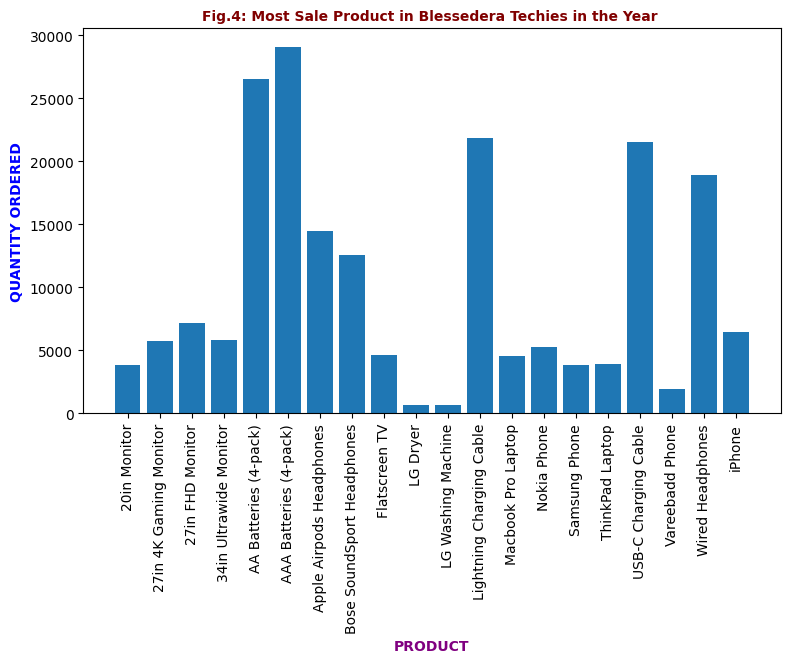

In [31]:
quantity_ordered =product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
fig = plt.figure(figsize=(9,5))
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=90)
plt.ylabel('QUANTITY ORDERED', color='blue', size=10, weight='bold')
plt.title('Fig.4: Most Sale Product in Blessedera Techies in the Year ',  color='maroon', size=10, weight='bold')
plt.xlabel('PRODUCT', color='purple', size=10, weight='bold' )
plt.show()

c:\users\havil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


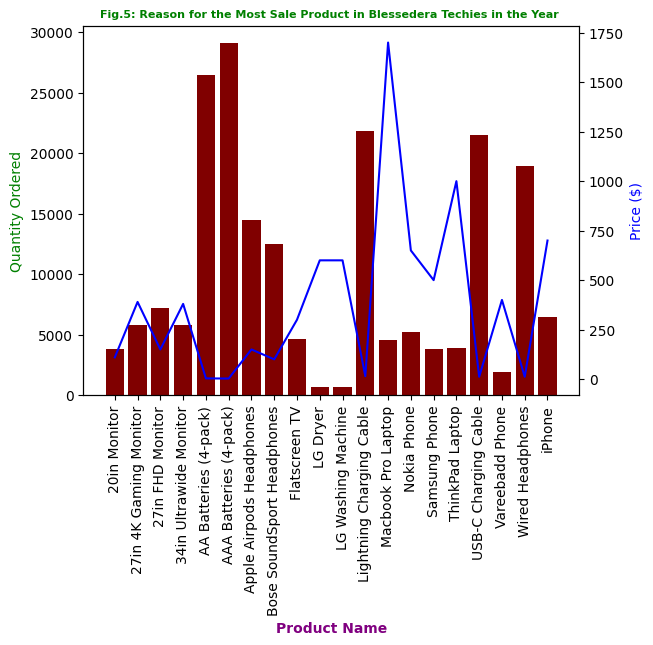

In [35]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='maroon',)
plt.title('Fig.5: Reason for the Most Sale Product in Blessedera Techies in the Year ',  color='green', size=8, weight='bold')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name',color='purple', size=10, weight='bold')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,  rotation=90)
# plt.xlabel('PRODUCT', color='purple', size=10, weight='bold' )
plt.show()


### The Lesser Price Products are the most sell because they are Cheap